In [2]:
import numpy as np
import matplotlib.pylab as plt
from mist_levy import *
from levy_beyond_mean_field import s3_exact_gaussian_filter

In this notebook we show how to examine the results of `mist_levy.py` for generating 2D Levy flight maps and studying their statistics over multiple realisations, given the input box parameters, step/field densities, smoothing scales, and Levy flight parameters. See `run_mist_levy.py` for more details, e.g., in the terminal `python run_mist_levy.py`.

We start by showing the statistics for different values of $l_0$ to show the robustness of the simulations. For convenience we define the following function for handling violin plots.

In [3]:
def plot_violins(fs_freqs, fs_Omh2, ax, quantiles=[0.16, 0.5, 0.84], \
                 color='red', ls='-', lw=1.5, alpha=0.25, widths=0.008):
    q = [quantiles for _ in range(len(fs_freqs))]
    v1=ax.violinplot(fs_Omh2, positions=fs_freqs, \
                     quantiles=q, showextrema=False, widths=widths)
    if quantiles != None:
        v1['cquantiles'].set_colors(color)
    for pc in v1['bodies']:
        pc.set_facecolor(color)
        pc.set_edgecolor(color)
        pc.set_linestyle(ls)
        pc.set_alpha(alpha)
        pc.set_linewidth(lw)
    return v1

The 2D Levy flight statistics are now shown below for the printed parameters (box dimensions=2000^2). Note that the data obtained through the master function `run_mist_levys` are saved as pickle files in the directory `./data`.

Input Parameters (minus l_0)
{'l_0': 0.01, 'alpha_0': 1.5, 'n_steps_per_pixel': 40, 'box_width': 2000, 'mode': '2D', 'pixel_size': 0.5, 'smoothing_scale_per_pix': 4, 'n_bins_density': 100, 'num_sims': 100, 'bmf': 3, 'lmd_max': 1000.0, 'dl': 0.025, 'h': 1e-10, 'ncpus': 4}


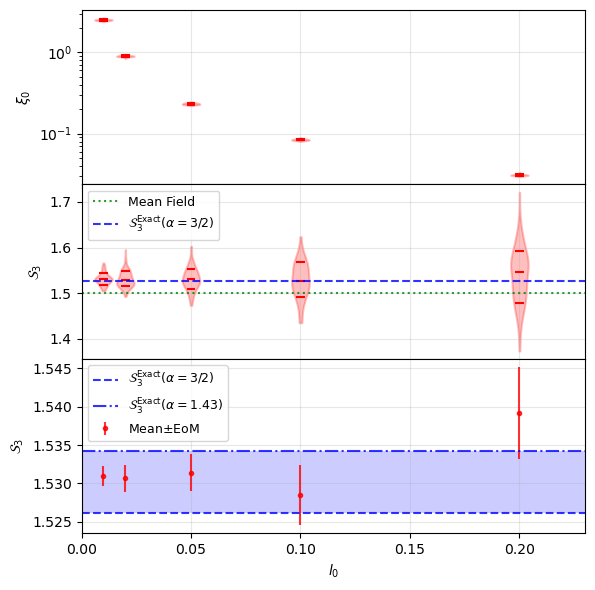

In [4]:
fig, ax=plt.subplots(figsize=(6,6), nrows=3, sharex=True)

# data
dir='data/'
l_0=0.01
with open(rf"data/levy_2d_l0_{l_0}.pkl", "rb") as input_file:
    my_levy_dict=pickle.load(input_file)
print('Input Parameters (minus l_0)')
print(my_levy_dict['input'])

all_s3=my_levy_dict['all_s3']
all_xi_0=my_levy_dict['all_xi_0']
n_reals=len(all_s3)
v0=plot_violins([l_0], all_xi_0, ax=ax[0])
v1=plot_violins([l_0], all_s3, ax=ax[1])
ax[2].errorbar(x=l_0, y=np.mean(all_s3), yerr=np.std(all_s3)/np.sqrt(n_reals), \
               fmt='r.', alpha=0.8, label=r'Mean$\pm$EoM')

for l_0 in [0.02, 0.05, 0.1, 0.2]:
    with open(rf"data/levy_2d_l0_{l_0}.pkl", "rb") as input_file:
        my_levy_dict=pickle.load(input_file)
    all_s3=my_levy_dict['all_s3']
    all_xi_0=my_levy_dict['all_xi_0']
    n_reals=len(all_s3)
    plot_violins([l_0], all_xi_0, ax=ax[0])
    plot_violins([l_0], all_s3, ax=ax[1])
    ax[2].errorbar(x=l_0, y=np.mean(all_s3), yerr=np.std(all_s3)/np.sqrt(n_reals), fmt='r.', alpha=0.8)

ax[1].axhline(y=1.5, ls=':', color='green', alpha=0.8, label='Mean Field')

ax[1].axhline(y=s3_exact_gaussian_filter(alpha=3/2, dim=2), ls='--', color='blue', \
              alpha=0.8, label=r'${\cal S}_3^{\rm Exact}(\alpha=3/2)$')

ax[2].axhline(y=s3_exact_gaussian_filter(alpha=3/2, dim=2), ls='--', color='blue', \
              alpha=0.8, label=r'${\cal S}_3^{\rm Exact}(\alpha=3/2)$')
ax[2].axhline(y=s3_exact_gaussian_filter(alpha=1.43, dim=2), ls='-.', color='blue', \
              alpha=0.8, label=r'${\cal S}_3^{\rm Exact}(\alpha=1.43)$')
xs=np.linspace(0, 0.23)
ax[2].fill_between(xs, \
                   y1=s3_exact_gaussian_filter(alpha=3/2, dim=2), \
                   y2=s3_exact_gaussian_filter(alpha=1.43, dim=2), \
                   facecolor='blue', alpha=0.2)

ax[0].set_yscale('log')
ax[0].set_ylabel(r'$\xi_0$'); ax[1].set_ylabel(r'${\cal S}_3$'); ax[2].set_ylabel(r'${\cal S}_3$')
ax[2].set_xlabel(r'$l_0$')
ax[2].set_xlim(min(xs), max(xs))
ax[1].legend(loc='upper left', prop={'size': 9})
ax[2].legend(loc='upper left', prop={'size': 9})
ax[0].grid(True, alpha=0.3); ax[1].grid(True, alpha=0.3); ax[2].grid(True, alpha=0.3)
fig.tight_layout(); fig.subplots_adjust(hspace=0)
# fig.savefig('figs/my_s3_violins_2d.pdf', dpi=300, bbox_inches='tight')
plt.show()

For a given input (e.g., Levy flight parameters), we show below how the PDFs of the density can be constructed. This is shown below, loading the pickle files and constructing the density PDFs

In [5]:
with open(r"data/levy_2d_l0_0.05.pkl", "rb") as input_file:
    my_levy_dict=pickle.load(input_file)
all_bin_centers_rho=my_levy_dict['all_bin_centers_rho']
all_pdf_rho=my_levy_dict['all_pdf_rho']
all_pdf_rho_mf=my_levy_dict['all_pdf_rho_mf']
all_pdf_rho_bmf=my_levy_dict['all_pdf_rho_bmf']
all_s3=my_levy_dict['all_s3']
all_xi_0=my_levy_dict['all_xi_0']
n_reals=len(all_s3)
print('Input Parameters')
print(my_levy_dict['input'])
print('S3 =', np.mean(all_s3), '+/-', np.std(all_s3))
print('xi_0 =', np.mean(all_xi_0), '+/-', np.std(all_xi_0))

bin_centers_rho_ave=np.mean(all_bin_centers_rho, axis=0)
bin_centers_rho_std=np.std(all_bin_centers_rho, axis=0)

pdf_rho_ave=np.mean(all_pdf_rho, axis=0)
pdf_rho_std=np.std(all_pdf_rho, axis=0)

pdf_rho_minus_mf_ave=np.mean(all_pdf_rho-all_pdf_rho_mf, axis=0)
pdf_rho_minus_mf_std=np.std(all_pdf_rho-all_pdf_rho_mf, axis=0)

pdf_rho_over_mf_ave=np.mean(all_pdf_rho/all_pdf_rho_mf, axis=0)
pdf_rho_over_mf_std=np.std(all_pdf_rho/all_pdf_rho_mf, axis=0)

pdf_rho_bmf_minus_mf_ave=np.mean(all_pdf_rho_bmf-all_pdf_rho_mf, axis=0)
pdf_rho_bmf_minus_mf_std=np.std(all_pdf_rho_bmf-all_pdf_rho_mf, axis=0)

pdf_rho_bmf_over_mf_ave=np.mean(all_pdf_rho_bmf/all_pdf_rho_mf, axis=0)
pdf_rho_bmf_over_mf_std=np.std(all_pdf_rho_bmf/all_pdf_rho_mf, axis=0)

Input Parameters
{'l_0': 0.05, 'alpha_0': 1.5, 'n_steps_per_pixel': 40, 'box_width': 2000, 'mode': '2D', 'pixel_size': 0.5, 'smoothing_scale_per_pix': 4, 'n_bins_density': 100, 'num_sims': 100, 'bmf': 3, 'lmd_max': 1000.0, 'dl': 0.025, 'h': 1e-10, 'ncpus': 4}
S3 = 1.5313808285313493 +/- 0.02439075386485986
xi_0 = 0.23219305510068997 +/- 0.005192465405667004


Note that the errors presented for ${\cal S}_3$ and $\xi_0$ are the standard error.

We compute the mean field and beyond mean field theoretical expectation values at the average local variance across realisations.

In [6]:
# # mean field and beyond mean field at mean values
pdf_rho_mf=PDF_rho_mf(bin_centers_rho_ave, np.mean(all_xi_0))

lmd_max=1e3; dl=0.025; h=1e-10
pdf_rho_bmf = PDF_rho_InvLaplaceMP(cgf=lambda x: cgf_bmf(x, alpha=3/2, bmf=3, dim=2), \
                                   rhos=bin_centers_rho_ave, xi_0=np.mean(all_xi_0), \
                                   lmd_max=lmd_max, dl=dl, h=h)
pdf_rho_bmf_eff = PDF_rho_InvLaplaceMP(cgf=lambda x: cgf_bmf(x, alpha=1.43, bmf=3, dim=2), \
                                       rhos=bin_centers_rho_ave, xi_0=np.mean(all_xi_0), \
                                       lmd_max=lmd_max, dl=dl, h=h)

The PDFs are presented below; for the simulations we show the error on the mean; for the theoretical predictions we show the results for the expected $\alpha=3/2$ and the effective $\alpha\sim1.43$ (obtained by directly measuring the two-point correlation function of the generated maps).

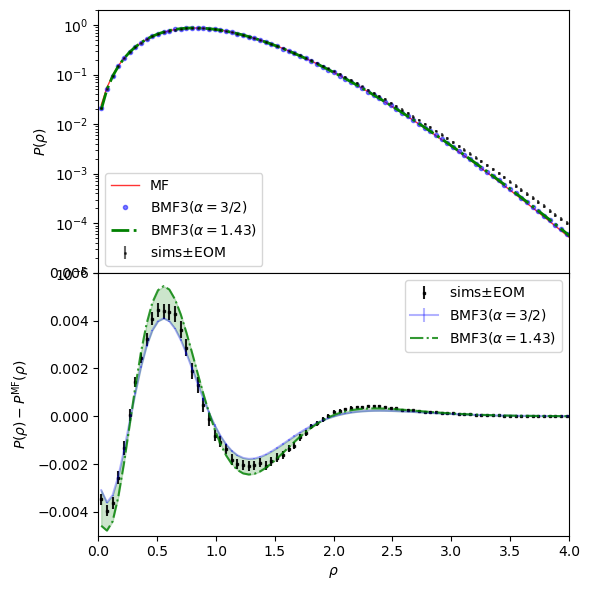

In [7]:
bin_intervals=1
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(6,6))
ax[0].errorbar(x=bin_centers_rho_ave[::bin_intervals], \
               y=pdf_rho_ave[::bin_intervals], \
               yerr=pdf_rho_std[::bin_intervals]/np.sqrt(n_reals), \
               fmt='ks', markersize=1, alpha=0.6, label=r'sims$\pm$EOM')
ax[0].plot(bin_centers_rho_ave[::bin_intervals], \
           pdf_rho_mf[::bin_intervals], 'r-', lw=1, alpha=0.8, label='MF')
ax[0].plot(bin_centers_rho_ave[::bin_intervals], \
           pdf_rho_bmf[::bin_intervals], 'b.', lw=1, alpha=0.5, label=r'BMF3($\alpha=3/2$)')
ax[0].plot(bin_centers_rho_ave[::bin_intervals], \
           pdf_rho_bmf_eff[::bin_intervals], 'g-.', lw=2, alpha=1, label=r'BMF3($\alpha=1.43$)')
ax[0].legend(loc='lower left')
ax[0].set_ylabel(r'$P(\rho)$')

ax[1].errorbar(x=bin_centers_rho_ave[::bin_intervals], \
               y=pdf_rho_minus_mf_ave[::bin_intervals], \
               yerr=pdf_rho_minus_mf_std[::bin_intervals]/np.sqrt(n_reals), \
               fmt='ks', markersize=2, alpha=0.9, label=r'sims$\pm$EOM')
ax[1].errorbar(x=bin_centers_rho_ave[::bin_intervals], \
               y=pdf_rho_bmf_minus_mf_ave[::bin_intervals], \
               yerr=pdf_rho_bmf_minus_mf_std[::bin_intervals]/np.sqrt(n_reals), \
               fmt='b-', markersize=1, alpha=0.3, label=r'BMF3($\alpha=3/2$)')
ax[1].errorbar(x=bin_centers_rho_ave[::bin_intervals], \
               y=pdf_rho_bmf_eff[::bin_intervals]-pdf_rho_mf[::bin_intervals], \
               fmt='g-.', markersize=1, alpha=0.8, label=r'BMF3($\alpha=1.43$)')
ax[1].fill_between(x=bin_centers_rho_ave[::bin_intervals], \
                   y1=pdf_rho_bmf_eff[::bin_intervals]-pdf_rho_mf[::bin_intervals], \
                   y2=pdf_rho_bmf_minus_mf_ave[::bin_intervals], \
                   facecolor='green', edgecolor='green', alpha=0.2)

ax[1].set_ylabel(r'$P(\rho) - P^{\rm MF}(\rho)$'); ax[1].set_xlabel(r'$\rho$')
ax[1].legend(loc='upper right')

ax[0].set_ylim(bottom=1e-5, top=2)
ax[1].set_ylim(top=0.006, bottom=-0.005)
ax[1].set_xlim(0, 4)
ax[0].set_yscale('log')
fig.tight_layout(); fig.subplots_adjust(hspace=0.00)
plt.show()

Other results can be similarly obtained and analyzed using the master function `run_mist_levys`.

End of notebook